In [43]:
import matplotlib.pyplot as plt
import torch
from importlib import reload
import ccc_nn_functions
from ccc_nn_functions import *
ccc_nn_functions = reload(ccc_nn_functions)

In [44]:
print('GPU is enabled:',torch.cuda.is_available())

GPU is enabled: True


In [22]:
#Train a model

# Data path
df_821_short_path = r'C:\Users\rz200\Documents\Development\cell-SCT\classification\imported_CSV\dataframe_821_short'
df_821_path = r'C:\Users\rz200\Documents\Development\cell-SCT\classification\imported_CSV\dataframe_821'
data_path = df_821_path #path to your data

## Cell cycle classification CNN on PCNA channel

In [12]:
# Path to save model
path_to_save = r'C:\Users\rz200\Documents\development\cell-SCT\classification\saved_models\test_model.pt' #path to which you want to save your model

# Training the model
iterators = get_iterators(data_path) #get the iterators: data train-test-val formatted
num_epochs = 3
train_ccc_model(num_epochs,path_to_save,iterators) #train the model
model = load_model(path_to_save) #load your model you just trained

C:\Users\rz200\Documents\development\cell-SCT\classification\ccc_nn_functions.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(ast.literal_eval(s))


Training examples: 91069 | Validation example: 10119 | Testing examples: 25298
The model has 61,111 trainable parameters
Torch Cuda is available: True


Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Training:   0%|          | 0/1423 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/159 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 2m 54s | Train Loss: 0.826 | Train Acc: 62.98% | Val. Loss: 0.770 |  Val. Acc: 64.94%


Training:   0%|          | 0/1423 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/159 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 2m 52s | Train Loss: 0.760 | Train Acc: 65.84% | Val. Loss: 0.754 |  Val. Acc: 65.97%


Training:   0%|          | 0/1423 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/159 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 2m 55s | Train Loss: 0.744 | Train Acc: 66.50% | Val. Loss: 0.739 |  Val. Acc: 66.89%


Evaluating:   0%|          | 0/396 [00:00<?, ?it/s]

Test Loss: 0.743 | Test Acc: 66.19%


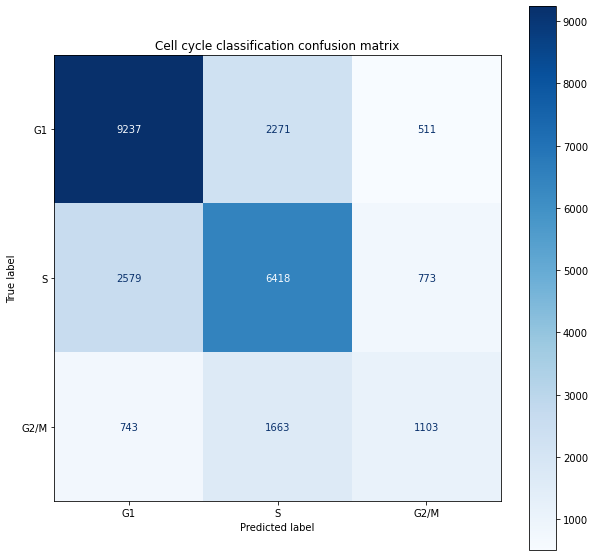

In [13]:
#Evaluate your model on your test data
test_iterator = iterators[2]
test_loss, test_acc = evaluate(model, test_iterator)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

#Confusion matrix
images, labels, probs = get_predictions(model, test_iterator)
pred_labels = torch.argmax(probs, 1)
plot_confusion_matrix(labels, pred_labels)

## Cell cycle classification CNN on DAPI channel

In [14]:
import pandas as pd

df = pd.read_csv(df_821_path)

In [46]:
# Path to save model
path_to_save = r'C:\Users\rz200\Documents\development\cell-SCT\classification\saved_models\test_model_DAPI.pt' #path to which you want to save your model

# Training the model
iterators = get_iterators(data_path,'dapi_crops') #get the iterators: data train-test-val formatted


C:\Users\rz200\Documents\development\cell-SCT\classification\ccc_nn_functions.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(ast.literal_eval(s))


Training examples: 91069 | Validation example: 10119 | Testing examples: 25298


In [47]:
num_epochs = 3
train_ccc_model(num_epochs,path_to_save,iterators) #train the model
model = load_model(path_to_save) #load your model you just trained

The model has 61,111 trainable parameters
Torch Cuda is available: True


Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Training:   0%|          | 0/1423 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/159 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 3m 13s | Train Loss: 0.767 | Train Acc: 61.78% | Val. Loss: 0.724 |  Val. Acc: 63.48%


Training:   0%|          | 0/1423 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/159 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 3m 3s | Train Loss: 0.706 | Train Acc: 65.26% | Val. Loss: 0.685 |  Val. Acc: 66.62%


Training:   0%|          | 0/1423 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/159 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 3m 2s | Train Loss: 0.691 | Train Acc: 66.16% | Val. Loss: 0.689 |  Val. Acc: 66.68%


## Training a CNN on 4 channels

In [18]:
from importlib import reload
import ccc_nn_functions
from ccc_nn_functions import *
ccc_nn_functions = reload(ccc_nn_functions)

In [19]:
df_821_path = r'C:\Users\rz200\Documents\Development\cell-SCT\classification\imported_CSV\dataframe_821'
data_path = df_821_path #path to your data

In [20]:
# Path to save model


# Training the model
channel_names = ['dapi_crops','edu_crops','cyclina2_crops','pcna_crops']
iterators = get_iterators(data_path,channel_names) #get the iterators: data train-test-val formatted
num_epochs = 3


C:\Users\rz200\Documents\development\cell-SCT\classification\ccc_nn_functions.py:106: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(ast.literal_eval(s))


Training examples: 91069 | Validation example: 10119 | Testing examples: 25298


TypeError: train_ccc_model() missing 1 required positional argument: 'channel_names'

In [21]:
path_to_save = r'C:\Users\rz200\Documents\development\cell-SCT\classification\saved_models\test_model_all_channels.pt' #path to which you want to save your model

train_ccc_model(num_epochs,path_to_save,iterators, channel_names) #train the model
model = load_model(path_to_save) #load your model you just trained

The model has 61,561 trainable parameters
Torch Cuda is available: True


Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Training:   0%|          | 0/1423 [00:00<?, ?it/s]

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [64, 0]

## ResNet

In [70]:
import os
import shutil
from PIL import Image

def sort_training_and_testing_data(df,test_size=0.2):
    shutil.rmtree('C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\data')

    #create a new dataframe where we shuffle the rows
    df_shuffled = np.copy(df)
    df_shuffled = df.sample(frac=1).reset_index(drop=True) #we could keep the index to keep for the cell names so its consistent with the first dataframe, would hepl later on
    df_shuffled = df[:100000]

    #create a new column in that dataframe called 'ground_truth'
    #for each row, if there is one True phase, that's the ground_truth
    #if there are no True phase or more than two, the ground_truth is 'unclassified' for now
    cycle_phase_encodings = []
    for i in range(len(df_shuffled['S_Phase'])):
        encoding_arr = []
        if df_shuffled['G1_Phase'][i]: encoding_arr.append('g1_phase')
        #else: encoding_arr.append(0)

        if df_shuffled['S_Phase'][i]: encoding_arr.append('s_phase')
        #else: encoding_arr.append(0)

        if df_shuffled['G2_M_Phase'][i]: encoding_arr.append('g2_m_phase')
        #else: encoding_arr.append(0)

        if len(encoding_arr) != 1: encoding_arr = ['unclassified']

        cycle_phase_encodings.append(encoding_arr)

    df_shuffled['ground_truth'] = cycle_phase_encodings

    #create a data directory
    os.mkdir('C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data')

    os.mkdir('C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\training_data')
    os.mkdir('C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\training_data\\g1_phase')
    os.mkdir('C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\training_data\\s_phase')
    os.mkdir('C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\training_data\\g2_m_phase')

    os.mkdir('C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\testing_data')
    os.mkdir('C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\testing_data\\g1_phase')
    os.mkdir('C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\testing_data\\s_phase')
    os.mkdir('C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\testing_data\\g2_m_phase')

    #take the first 1-test_size (0.8) and put them in the train folders
    #create a training_data directory inside the data directory
    #create an s_phase, g1_phase and g2_m_phase directories in there
    #for each row in the first 0.8 of the dataframe, put the EdU numpy arrays in the corresponding folders
    last_train_row = round(len(df_shuffled.index)*(1-test_size))
    for i in range(last_train_row):
        if i % 1000 == 0: print(str(i+1) + '/' + str(last_train_row))
        name = 'cell_' + str(i)

        arr = str2array(df_shuffled['pcna_crops'][i])
        if arr.dtype is np.dtype('object'):
            continue


        if df_shuffled['ground_truth'][i] == ['g1_phase']:
            path = 'C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\training_data\\g1_phase\\' + name + '.png'
            arr = str2array(df_shuffled['pcna_crops'][i])
            im = Image.fromarray(arr)
            im = im.convert("L")
            im.save(path)

        elif df_shuffled['ground_truth'][i] == ['s_phase']:
            path = 'C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\training_data\\s_phase\\' + name + '.png'
            arr = str2array(df_shuffled['pcna_crops'][i])
            im = Image.fromarray(arr)
            im = im.convert("L")
            im.save(path)

        elif df_shuffled['ground_truth'][i] == ['g2_m_phase']:
            path = 'C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\training_data\\g2_m_phase\\' + name + '.png'
            arr = str2array(df_shuffled['pcna_crops'][i])
            im = Image.fromarray(arr)
            im = im.convert("L")
            im.save(path)

    #do the same for the testing data
    for i in range(last_train_row,len(df.index)):
        if i % 1000 == 0: print(str(i+last_train_row+1) + '/' + str(len(df.index)))

        arr = str2array(df_shuffled['pcna_crops'][i])
        if arr.dtype is np.dtype('object'):
            continue

        name = 'cell_' + str(i)
        if df_shuffled['ground_truth'][i] == ['g1_phase']:
            path = 'C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\testing_data\\g1_phase\\' + name + '.png'
            arr = str2array(df_shuffled['pcna_crops'][i])
            im = Image.fromarray(arr)
            im = im.convert("L")
            im.save(path)

        elif df_shuffled['ground_truth'][i] == ['s_phase']:
            path = 'C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\testing_data\\s_phase\\' + name + '.png'
            arr = str2array(df_shuffled['pcna_crops'][i])
            im = Image.fromarray(arr)
            im = im.convert("L")
            im.save(path)

        elif df_shuffled['ground_truth'][i] == ['g2_m_phase']:
            path = 'C:\\Users\\rz200\\Documents\\development\\cell-SCT\\classification\\data\\testing_data\\g2_m_phase\\' + name + '.png'
            arr = str2array(df_shuffled['pcna_crops'][i])
            im = Image.fromarray(arr)
            im = im.convert("L")
            im.save(path)

    #no need to return anything

sort_training_and_testing_data(df)

C:\Users\rz200\AppData\Local\Temp\ipykernel_4544\161000061.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shuffled['ground_truth'] = cycle_phase_encodings


1/80000


C:\Users\rz200\Documents\development\cell-SCT\classification\ccc_nn_functions.py:98: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(ast.literal_eval(s))


1001/80000
2001/80000
3001/80000
4001/80000
5001/80000
6001/80000
7001/80000
8001/80000
9001/80000
10001/80000
11001/80000
12001/80000
13001/80000
14001/80000
15001/80000
16001/80000
17001/80000
18001/80000
19001/80000
20001/80000
21001/80000
22001/80000
23001/80000
24001/80000
25001/80000
26001/80000
27001/80000
28001/80000
29001/80000
30001/80000
31001/80000
32001/80000
33001/80000
34001/80000
35001/80000
36001/80000
37001/80000
38001/80000
39001/80000
40001/80000
41001/80000
42001/80000
43001/80000
44001/80000
45001/80000
46001/80000
47001/80000
48001/80000
49001/80000
50001/80000
51001/80000
52001/80000
53001/80000
54001/80000
55001/80000
56001/80000
57001/80000
58001/80000
59001/80000
60001/80000
61001/80000
62001/80000
63001/80000
64001/80000
65001/80000
66001/80000
67001/80000
68001/80000
69001/80000
70001/80000
71001/80000
72001/80000
73001/80000
74001/80000
75001/80000
76001/80000
77001/80000
78001/80000
79001/80000
160001/140034
161001/140034
162001/140034
163001/140034
16400

KeyError: 100000

In [1]:
# Top level data directory. Here we assume the format of the directory conforms
#   to the ImageFolder structure
data_dir = r'C:\Users\rz200\Documents\development\cell-SCT\classification\data'

# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "resnet"

# Number of classes in the dataset
num_classes = 3

# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Number of epochs to train for
num_epochs = 15

# Flag for feature extracting. When False, we finetune the whole model,
#   when True we only update the reshaped layer params
feature_extract = True

In [2]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == 'train':
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

PyTorch Version:  1.11.0+cu113
Torchvision Version:  0.12.0+cu113


In [3]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [4]:
from torchvision import models


def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

# Initialize the model for this run
model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Initializing Datasets and Dataloaders...")

# Create training and validation datasets
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
# Create training and validation dataloaders
dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'val']}

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print('Done!')

Initializing Datasets and Dataloaders...
Done!


In [6]:
# Send the model to GPU
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

Params to learn:
	 fc.weight
	 fc.bias


In [7]:
print('GPU is enabled:',torch.cuda.is_available())

GPU is enabled: True


In [8]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Train and evaluate
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=(model_name=="inception"))

Epoch 0/14
----------
train Loss: 1.0881 Acc: 0.4311
val Loss: 1.0413 Acc: 0.3670

Epoch 1/14
----------
train Loss: 1.0962 Acc: 0.4352
val Loss: 0.9863 Acc: 0.5008

Epoch 2/14
----------
train Loss: 1.0879 Acc: 0.4323
val Loss: 1.0376 Acc: 0.3669

Epoch 3/14
----------
train Loss: 1.0951 Acc: 0.4318
val Loss: 1.0108 Acc: 0.5008

Epoch 4/14
----------
train Loss: 1.0949 Acc: 0.4326
val Loss: 1.0932 Acc: 0.5004

Epoch 5/14
----------


KeyboardInterrupt: 

## Notes

In [19]:
#We can try a model with pre-trained weights
#source: https://pytorch.org/vision/stable/models.html

RuntimeError: No such operator profiler::_record_function_enter_new

In [ ]:
#Now we should make all of this a pipeline where you just need to give the CSV file. Done
#Also we should have a prediction function. Already done
#Later on we need to modify this to be a mask to add on the segmented cells
    #The input to the network has to be an image made just from the segmentation mask of the cell, and the rest is padded to be squared, so no background
    #The cells need to be kept with an index for the segmentation mask of the cell to be brought back as labelled in the end

In [ ]:
#I should try making a better segmentation model with CellPose2, then segmenting out the cells from both plates into two CSVs that we then put together, and then training this classification model

In [ ]:
#Try the same model but with the CyclinA2 crops

In [ ]:
#make a model to try and guess the DAPI, CyclinA2 and EdU values just from the PCNA values

In [ ]:
#Next steps
 #Add a 'column name' input to choose which channel crops we want to train the model on. Doing it.
 #Add a function to just give a cell image and it gets the segmentation and it gets the predictions of all of its cells as a mask, it should keep the coordinates of the cell crops it makes
 #Change the model to only take the segmentation mask to make the prediction, not the crops
 #Make a new notebook that presents all of these functions together as a single pipeline
 #Make a GUI that presents the cell masks and we can hover over a cell to showcase it and it would give its cell phase
 #Look into Grad-CAM to get heat maps of regions with a greater weight in CNN classification
 #Paper consolidation of the research on training a model for cell cycle classification, the data they had, the model they used and their results